In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import scipy

import shutil

import warnings
warnings.filterwarnings("ignore")

# Dicionários

In [22]:
crossovers = {
    0: "DEF",
    1: "RSC",
    2: "FVSC",
    3: "SAC",
    4: "SSC",
    5: "SCPS" 
}

distances = {
    0: "ABS",
    1: "COS"
}

## Carrega os Dados

In [23]:
dfs = []

# Set the root directory where you want to search for "res.csv"
root_directories = ['fs/results']  # Replace with your directory path

for root_directory in root_directories:
    # Use the glob module to find all files named "res.csv" recursively
    csv_files = glob.glob(os.path.join(root_directory, '**', '*.csv'), recursive=True)

    # Print the paths of all found "res.csv" files
    for file in csv_files:
        # print(file)
        df = pd.read_csv(file, sep = ";", header=None)
        # print(df)

        df.columns = ["seed", "problem", "variation", "distance", "lower", "upper", "time", "training", "test", "validation", "model"]
        
        # print(file)
        dfs.append(df)
            
results = pd.concat(dfs)
results["training"] = pd.to_numeric(results["training"])
results["test"] = pd.to_numeric(results["test"])
results["validation"] = pd.to_numeric(results["validation"])
results["lower"] = pd.to_numeric(results["lower"])
results["upper"] = pd.to_numeric(results["upper"])

results["variation"] = results["variation"].apply(lambda x: crossovers[x])
results["distance"] = results["distance"].apply(lambda x: distances[x])

results = results.reset_index(drop=True)
results = results.sort_values(by=["variation", "distance", "lower", "upper", "problem"])

results.to_csv("results.csv")

results

,seed,problem,variation,distance,lower,upper,time,training,test,validation,model
14,0.0,f1,DEF,ABS,0.00,1.0,36455,9.123340e-01,1.090888e+00,5.418883e+01,f0() = (54.1888261) x1 x1 exp * x1 1 * sin ...
730,1.0,f1,DEF,ABS,0.00,1.0,35698,9.992007e-16,4.163336e-16,1.365574e-14,f0() = (1.36557432e-14) 1 x1 + x1 x1 * * x1 +
2207,3.0,f1,DEF,ABS,0.00,1.0,37283,1.019504e-01,9.674653e-02,4.932292e+00,f0() = (4.932291984) x1 exp exp x1 1 sin 1 ...
2949,4.0,f1,DEF,ABS,0.00,1.0,42145,3.633389e-01,4.040796e-01,2.056048e+01,f0() = (20.56048405) x1 x1 exp * x1 x1 sin ...
3690,5.0,f1,DEF,ABS,0.00,1.0,39679,4.074117e-02,2.051197e-02,1.273395e+00,f0() = (1.273394583) x1 x1 exp * x1 cos log...
...,...,...,...,...,...,...,...,...,...,...,...
71016,95.0,f9,SSC,COS,0.01,0.1,95786,3.935771e-01,4.148456e-01,3.916905e+00,f0() = (3.916904951) x1 sin x2 x2 exp log s...
71774,96.0,f9,SSC,COS,0.01,0.1,131557,1.350117e-01,1.500841e-01,1.182773e+00,f0() = (1.182773386) x1 sin x2 x2 x2 cos co...
72521,97.0,f9,SSC,COS,0.01,0.1,156264,9.640628e-01,1.011371e+00,8.188220e+00,f0() = (8.188219792) x2 x2 sin * x1 exp log...
73262,98.0,f9,SSC,COS,0.01,0.1,149396,1.361820e+00,1.425873e+00,1.201676e+01,f0() = (12.01676258) x1 sin exp x2 sin cos ...


In [24]:
results = pd.read_csv("results.csv")
results = results.drop_duplicates()
results = results[results.variation != "FVSC"]
results

,Unnamed: 0,seed,problem,variation,distance,lower,upper,time,training,test,validation,model
0,14,0.0,f1,DEF,ABS,0.00,1.0,36455,9.123340e-01,1.090888e+00,5.418883e+01,f0() = (54.1888261) x1 x1 exp * x1 1 * sin ...
1,730,1.0,f1,DEF,ABS,0.00,1.0,35698,9.992007e-16,4.163336e-16,1.365574e-14,f0() = (1.36557432e-14) 1 x1 + x1 x1 * * x1 +
2,2207,3.0,f1,DEF,ABS,0.00,1.0,37283,1.019504e-01,9.674653e-02,4.932292e+00,f0() = (4.932291984) x1 exp exp x1 1 sin 1 ...
3,2949,4.0,f1,DEF,ABS,0.00,1.0,42145,3.633389e-01,4.040796e-01,2.056048e+01,f0() = (20.56048405) x1 x1 exp * x1 x1 sin ...
4,3690,5.0,f1,DEF,ABS,0.00,1.0,39679,4.074117e-02,2.051197e-02,1.273395e+00,f0() = (1.273394583) x1 x1 exp * x1 cos log...
...,...,...,...,...,...,...,...,...,...,...,...,...
73969,71016,95.0,f9,SSC,COS,0.01,0.1,95786,3.935771e-01,4.148456e-01,3.916905e+00,f0() = (3.916904951) x1 sin x2 x2 exp log s...
73970,71774,96.0,f9,SSC,COS,0.01,0.1,131557,1.350117e-01,1.500841e-01,1.182773e+00,f0() = (1.182773386) x1 sin x2 x2 x2 cos co...
73971,72521,97.0,f9,SSC,COS,0.01,0.1,156264,9.640628e-01,1.011371e+00,8.188220e+00,f0() = (8.188219792) x2 x2 sin * x1 exp log...
73972,73262,98.0,f9,SSC,COS,0.01,0.1,149396,1.361820e+00,1.425873e+00,1.201676e+01,f0() = (12.01676258) x1 sin exp x2 sin cos ...


In [25]:
print(results.distance.value_counts())

distance
COS    36988
ABS    36986
Name: count, dtype: int64


In [26]:
print(results.variation.value_counts())

variation
RSC     29997
SSC     29983
SAC      9996
SCPS     2000
DEF      1998
Name: count, dtype: int64


In [27]:
print(results.problem.value_counts())

problem
f1     7399
f3     7399
f7     7399
f6     7399
f9     7398
f8     7398
f5     7397
f2     7397
f4     7396
f10    7392
Name: count, dtype: int64


In [28]:
print(results[['lower', 'upper']].value_counts())

lower    upper  
0.00000  0.00001    6000
         0.00010    5999
         0.01000    5999
         0.00100    5998
         0.10000    5995
0.00001  0.00100    4000
0.00010  0.10000    4000
         0.00100    4000
0.00001  0.10000    3999
0.00000  1.00000    3998
0.00010  0.01000    3998
0.00001  0.01000    3998
0.00100  0.10000    3998
         0.01000    3998
0.01000  0.10000    3998
0.00001  0.00010    3996
Name: count, dtype: int64


### fit_model

In [29]:
fit_model = "validation"

## Lista dos algoritmos

In [30]:
algorithms = results.groupby(["variation", "distance", "lower", "upper"]).size().reset_index(name='contagem').sort_values(by="contagem")
algorithms

,variation,distance,lower,upper,contagem
49,SSC,ABS,0.00001,0.0001,996
0,DEF,ABS,0.00000,1.0000,998
63,SSC,COS,0.00000,0.1000,998
57,SSC,ABS,0.00100,0.1000,998
41,SAC,COS,0.00000,0.1000,998
...,...,...,...,...,...
12,RSC,ABS,0.00010,0.0100,1000
13,RSC,ABS,0.00010,0.1000,1000
15,RSC,ABS,0.00100,0.1000,1000
16,RSC,ABS,0.01000,0.1000,1000


In [31]:
problems = results.groupby(["problem"]).size().reset_index(name='contagem').sort_values(by="contagem")
problems

,problem,contagem
1,f10,7392
4,f4,7396
5,f5,7397
2,f2,7397
9,f9,7398
8,f8,7398
3,f3,7399
0,f1,7399
7,f7,7399
6,f6,7399


## Medianas

In [32]:
# Criar o DataFrame pivô com a mediana do fitness
results = results.sort_values(by=['problem'])
grouped = results.pivot_table(index=['problem'], columns=['variation', 'distance', 'lower', 'upper'], values=fit_model, aggfunc='median')

grouped = grouped.apply(lambda x: (x + 1) / (x.min() + 1), axis=1)

grouped

variation       DEF                 RSC                                \
distance        ABS       COS       ABS                                 
lower       0.00000   0.00000   0.00000                                 
upper       1.00000   1.00000   0.00001   0.00010   0.00100   0.01000   
problem                                                                 
f1         1.043825  1.044367  1.582281  1.358697  1.535335  1.476944   
f10        2.942299  2.900489  3.437388  2.243074  3.146796  2.644591   
f2         1.268383  1.268383  1.434251  1.293862  1.457189  1.306644   
f3         1.395976  1.395976  1.438523  1.246641  1.408127  1.336726   
f4         1.086326  1.086326  1.340893  1.284892  1.321118  1.350203   
f5         1.608353  1.608353  1.490024  1.252226  1.334037  1.375007   
f6         1.244045  1.244045  1.372280  1.404104  1.253818  1.237147   
f7         1.336544  1.336544  1.633221  1.357482  1.223829  1.429393   
f8         1.193030  1.193030  1.273420  1.177877  1.497745  1.446715   
f9         1.000000  1.000000  4.480647  1.000000  1.560574  2.298602   

variation                                          ...       SSC            \
distance                                           ...       COS             
lower                 0.00001                      ...   0.00001             
upper       0.10000   0.00010   0.00100   0.01000  ...   0.00010   0.00100   
problem                                            ...                       
f1         1.478812  1.091889  1.000000  1.300153  ...  2.583623  2.539347   
f10        2.105596  2.937610  2.531296  1.813693  ...  6.028575  3.485951   
f2         1.279641  1.139413  1.408373  1.269258  ...  2.266008  2.086106   
f3         1.346630  1.296376  1.249689  1.228219  ...  2.603479  2.154936   
f4         1.388629  1.120790  1.328665  1.218580  ...  2.084911  1.867627   
f5         1.140892  1.422802  1.209375  1.329397  ...  3.325185  2.290427   
f6         1.300374  1.250210  1.174041  1.203626  ...  2.688243  1.630155   
f7         1.400945  1.392619  1.477653  1.082951  ...  2.276085  2.127295   
f8         1.504499  1.336812  1.431548  1.161769  ...  2.795847  2.144168   
f9         3.678959  1.000000  1.000000  1.000000  ...  9.188220  9.188220   

variation                                                              \
distance                                                                
lower                           0.00010                       0.00100   
upper       0.01000   0.10000   0.00100   0.01000   0.10000   0.01000   
problem                                                                 
f1         1.864509  1.542230  2.617178  1.620373  1.816690  1.397179   
f10        1.103491  1.000000  3.765718  1.184897  1.189150  2.029507   
f2         1.699137  1.120653  2.177651  1.567755  1.219887  1.512683   
f3         1.599077  1.257554  1.867347  1.641698  1.247627  1.268802   
f4         1.091595  1.188525  2.035532  1.363912  1.182602  1.255350   
f5         2.173030  1.195354  2.459484  2.559114  1.354174  2.409556   
f6         1.249670  1.150436  1.673528  1.193908  1.168047  1.813980   
f7         1.357599  1.000000  1.921249  1.396340  1.028802  1.637315   
f8         1.440478  1.000000  2.057964  1.772888  1.275570  1.817858   
f9         9.188220  7.382073  9.188220  9.188220  9.188220  9.188220   

variation                      
distance                       
lower                 0.01000  
upper       0.10000   0.10000  
problem                        
f1         1.579082  1.624931  
f10        1.505397  4.023669  
f2         1.299408  1.289837  
f3         1.293009  1.308122  
f4         1.356688  1.298859  
f5         1.713508  2.227445  
f6         1.000000  1.347036  
f7         1.296321  1.336705  
f8         1.166182  1.209491  
f9         9.188220  9.188220  

[10 rows x 74 columns]

# PP por Crossover

In [33]:
from pp2 import pp

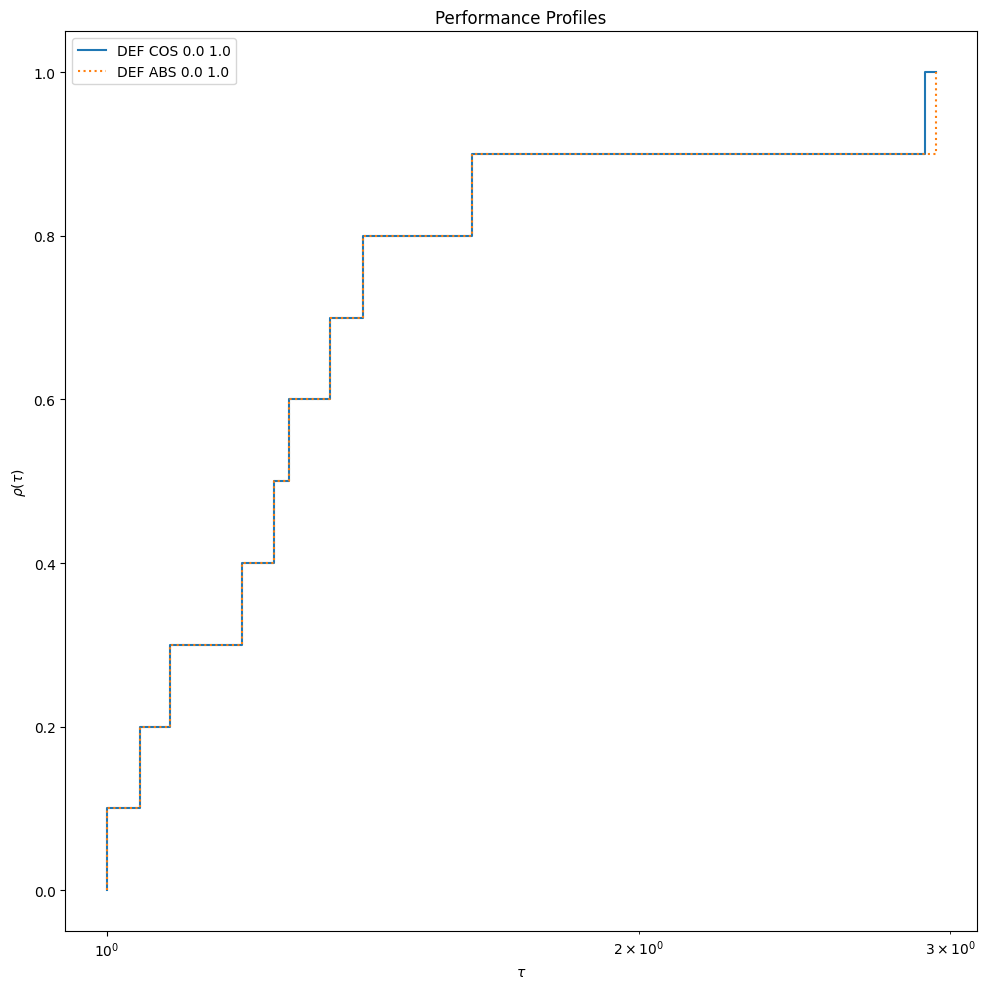

DEF COS 0.0 1.0 1.0
DEF ABS 0.0 1.0 0.9973107155747392


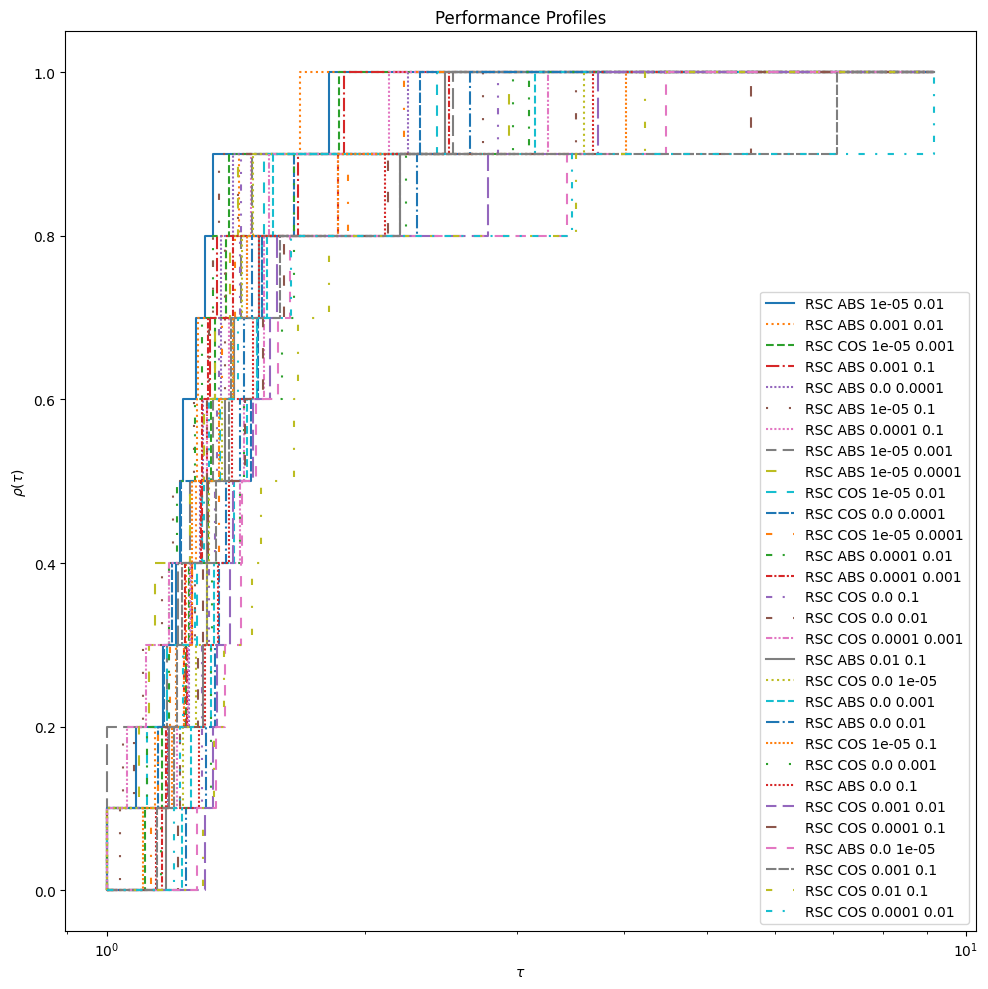

RSC ABS 1e-05 0.01 1.0
RSC ABS 0.001 0.01 0.996588444486087
RSC COS 1e-05 0.001 0.9906527576348525
RSC ABS 0.001 0.1 0.9887975956804322
RSC ABS 0.0 0.0001 0.987244204219715
RSC ABS 1e-05 0.1 0.9860350838497214
RSC ABS 0.0001 0.1 0.9856979544689146
RSC ABS 1e-05 0.001 0.9848249752103542
RSC ABS 1e-05 0.0001 0.982581121919282
RSC COS 1e-05 0.01 0.9803382970763012
RSC COS 0.0 0.0001 0.980130658944365
RSC COS 1e-05 0.0001 0.9785020014952955
RSC ABS 0.0001 0.01 0.9782922297086367
RSC ABS 0.0001 0.001 0.9767455402998877
RSC COS 0.0 0.1 0.9743368477782917
RSC COS 0.0 0.01 0.9736656693538043
RSC COS 0.0001 0.001 0.9688309180301086
RSC ABS 0.01 0.1 0.9670052327032328
RSC COS 0.0 1e-05 0.9648387614702684
RSC ABS 0.0 0.001 0.9605053465264857
RSC ABS 0.0 0.01 0.9584441129286916
RSC COS 1e-05 0.1 0.9555726461684626
RSC COS 0.0 0.001 0.951544440519228
RSC ABS 0.0 0.1 0.9493238367355427
RSC COS 0.001 0.01 0.9335099747038633
RSC COS 0.0001 0.1 0.9241073056996604
RSC ABS 0.0 1e-05 0.913272520518279
RSC

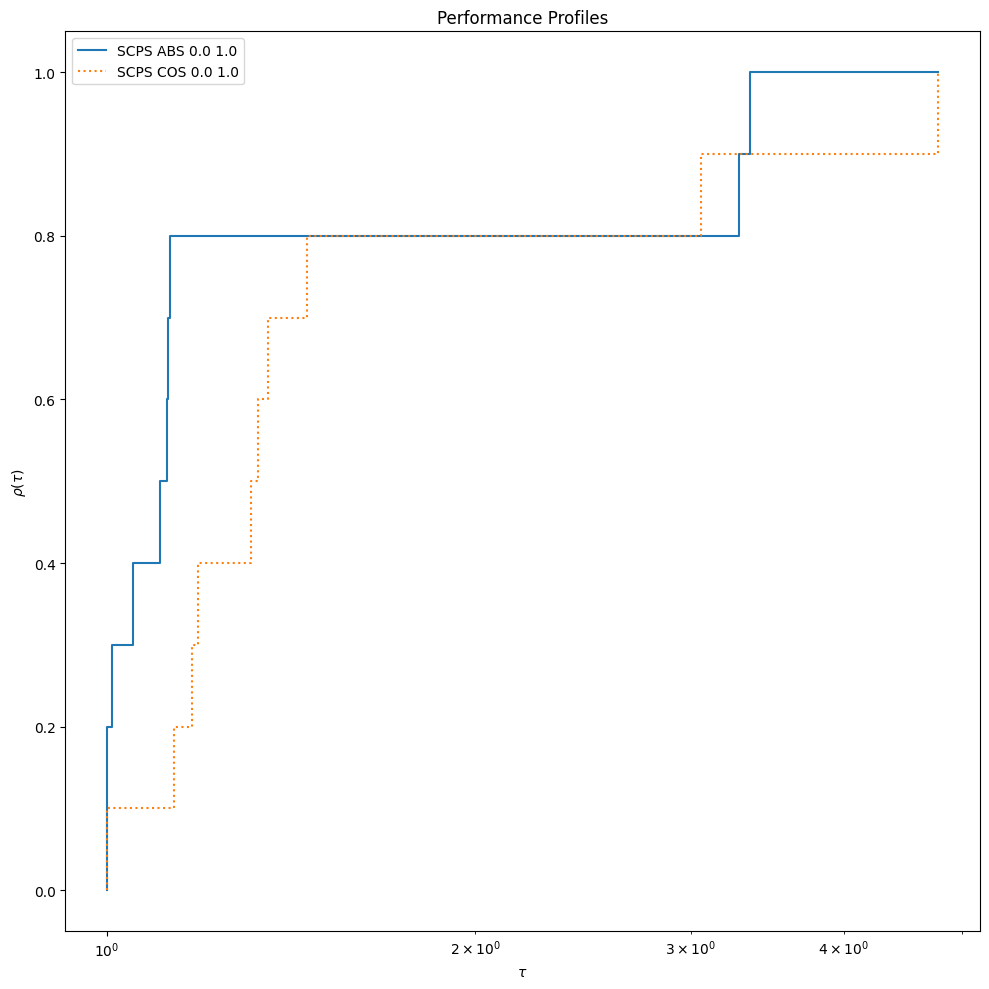

SCPS ABS 0.0 1.0 1.0
SCPS COS 0.0 1.0 0.9198252254251919


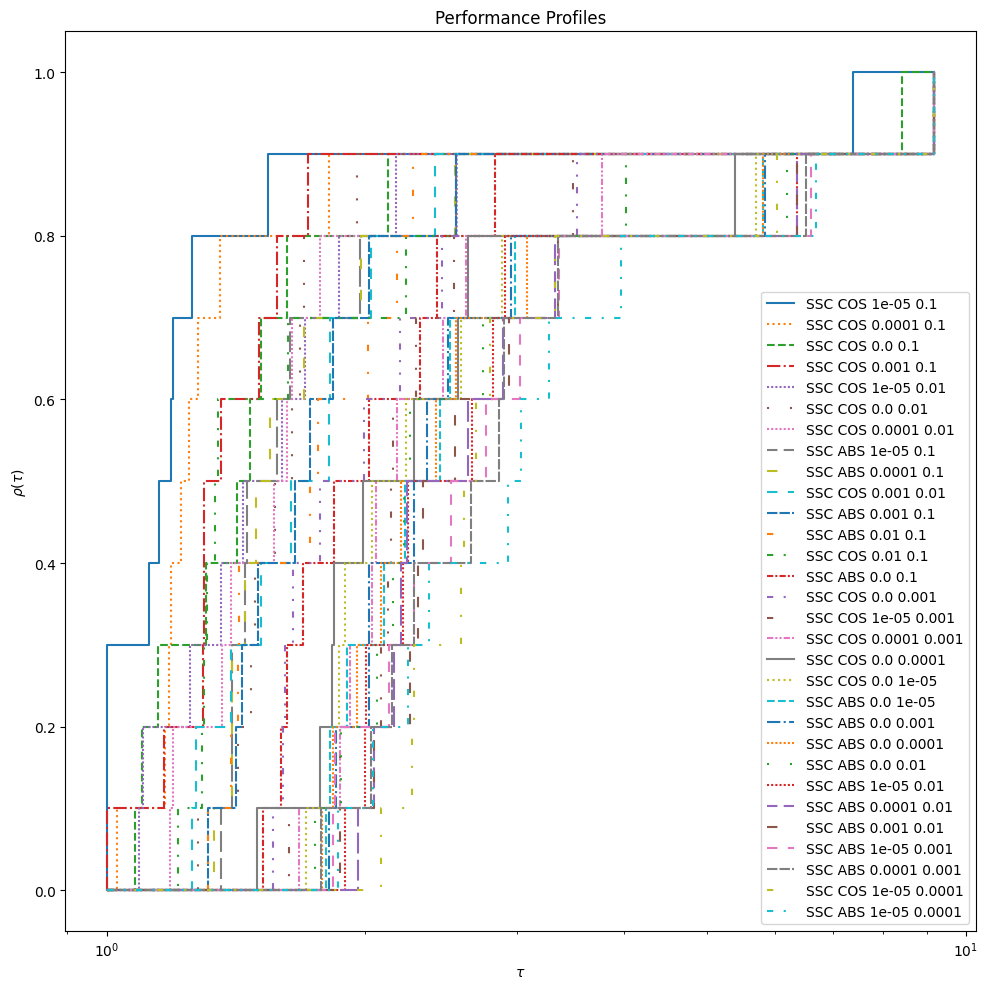

SSC COS 1e-05 0.1 1.0
SSC COS 0.0001 0.1 0.9617269005680653
SSC COS 0.0 0.1 0.9546169778071606
SSC COS 0.001 0.1 0.9519080057783015
SSC COS 1e-05 0.01 0.9334194745455243
SSC COS 0.0 0.01 0.9250086858770402
SSC COS 0.0001 0.01 0.923664673078167
SSC ABS 1e-05 0.1 0.9169574074894012
SSC ABS 0.0001 0.1 0.9163873984372799
SSC COS 0.001 0.01 0.9123020755761175
SSC ABS 0.001 0.1 0.9081327814923396
SSC ABS 0.01 0.1 0.9074129644124899
SSC COS 0.01 0.1 0.9052271690126507
SSC ABS 0.0 0.1 0.8756319079735706
SSC COS 0.0 0.001 0.8688084166977491
SSC COS 1e-05 0.001 0.8422939278091763
SSC COS 0.0001 0.001 0.8389224820721821
SSC COS 0.0 0.0001 0.8224868486562094
SSC COS 0.0 1e-05 0.8099749680097301
SSC ABS 0.0 1e-05 0.7980658768652817
SSC ABS 0.0 0.001 0.7976995915732359
SSC ABS 0.0 0.0001 0.7965731247268072
SSC ABS 0.0 0.01 0.7851167203000718
SSC ABS 1e-05 0.01 0.7779754086879793
SSC ABS 0.0001 0.01 0.7682978485844679
SSC ABS 0.001 0.01 0.7656510062890749
SSC ABS 1e-05 0.001 0.7608755677868819
SSC AB

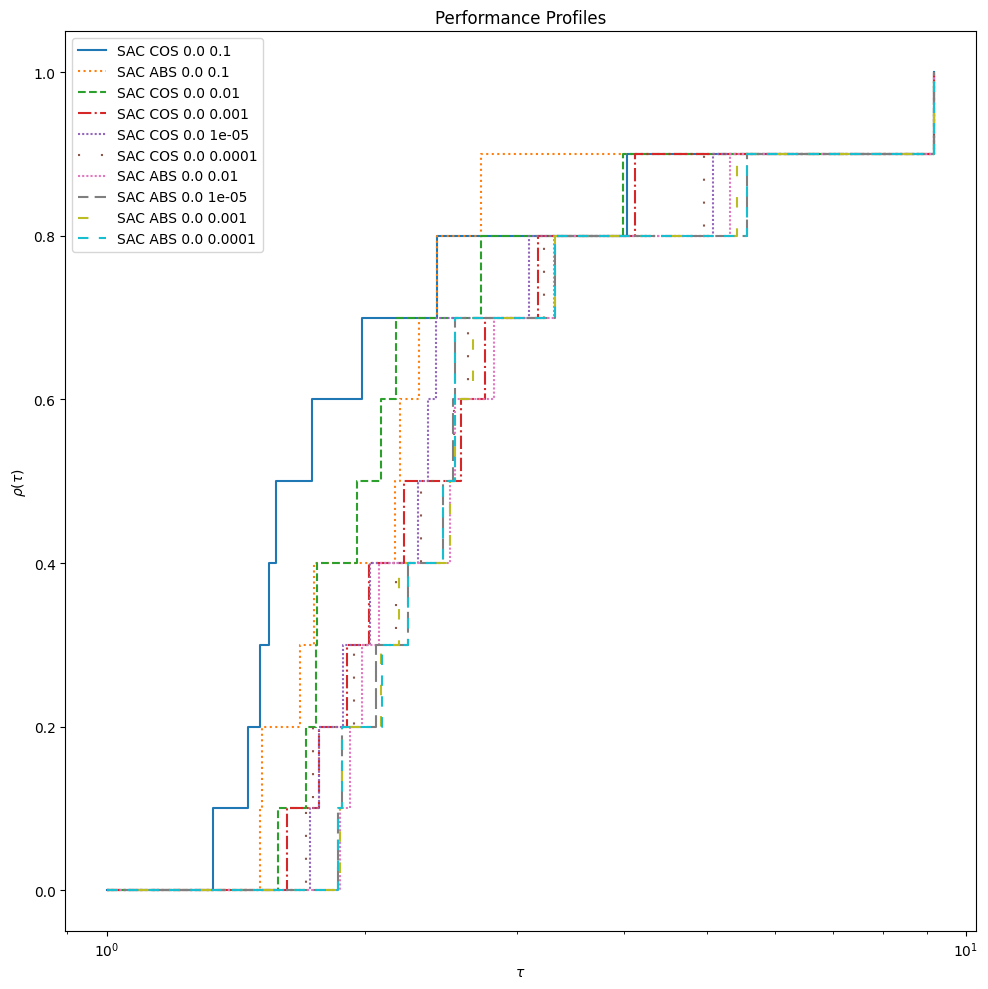

SAC COS 0.0 0.1 1.0
SAC ABS 0.0 0.1 0.9895088292948102
SAC COS 0.0 0.01 0.9670940785181283
SAC COS 0.0 0.001 0.9295345591457331
SAC COS 0.0 1e-05 0.9220523428871406
SAC COS 0.0 0.0001 0.9132922851038185
SAC ABS 0.0 0.01 0.896085974537581
SAC ABS 0.0 1e-05 0.8945218231627758
SAC ABS 0.0 0.001 0.894118421208022
SAC ABS 0.0 0.0001 0.8937747253169084


In [34]:
variations = results.variation.unique()

best_algorithms = []

for v in variations:
    resume = grouped.loc[:, pd.IndexSlice[v, :]]
    resume.columns = [f"{i[0]} {i[1]} {i[2]} {i[3]}" for i in resume.columns]
    
    areas = pp(resume, v)
    areas = dict(sorted(areas.items(), key=lambda item: item[1], reverse=1))
    for x in areas:
        print(x, areas[x])
    best_algorithms.append(max(areas, key=areas.get))

In [35]:
best_algorithms = [algorithm.split(" ") for algorithm in best_algorithms]
best_algorithms

[['DEF', 'COS', '0.0', '1.0'],
 ['RSC', 'ABS', '1e-05', '0.01'],
 ['SCPS', 'ABS', '0.0', '1.0'],
 ['SSC', 'COS', '1e-05', '0.1'],
 ['SAC', 'COS', '0.0', '0.1']]

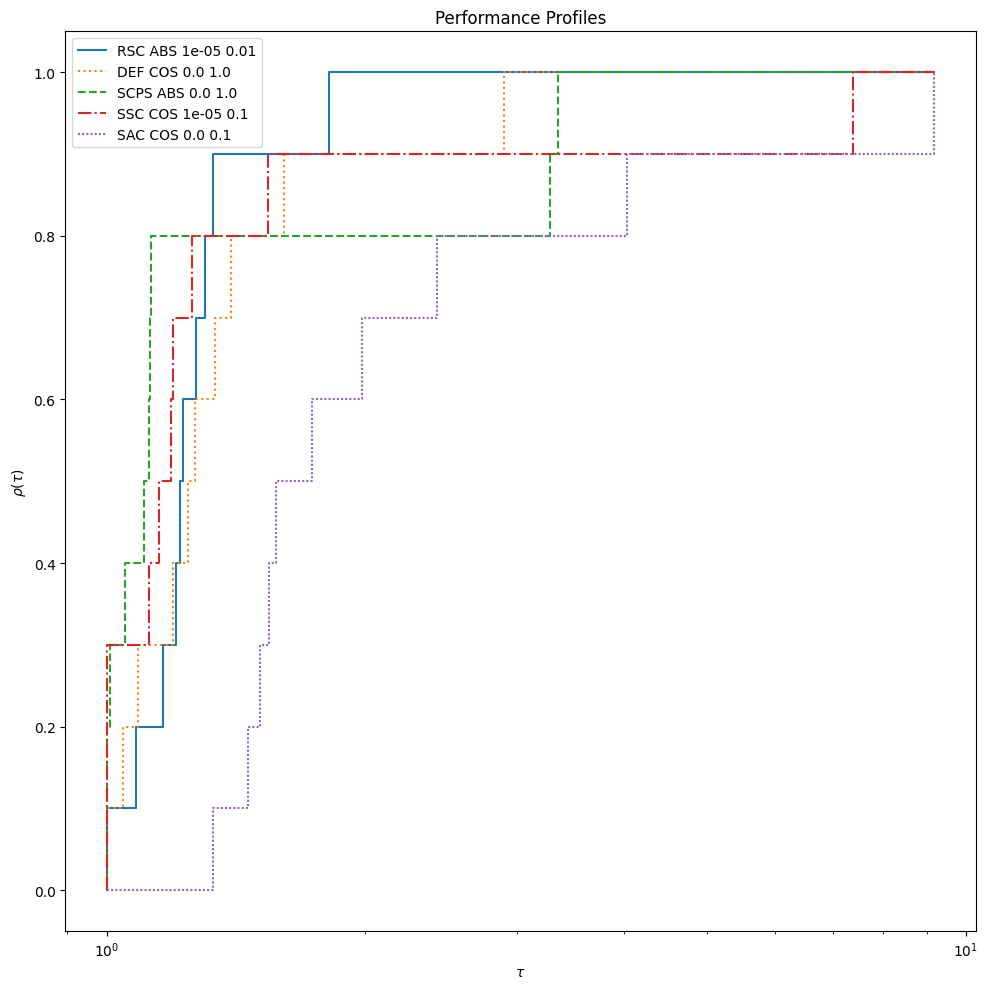

{'RSC ABS 1e-05 0.01': 1.0,
 'DEF COS 0.0 1.0': 0.9814585120744517,
 'SCPS ABS 0.0 1.0': 0.967671514667787,
 'SSC COS 1e-05 0.1': 0.9340370979396216,
 'SAC COS 0.0 0.1': 0.8213493387825741}

In [36]:
dfs = {}

for x in best_algorithms:
    variation, distance, lower, upper = x[0], x[1], x[2], x[3]
    
    df = grouped.loc[:, pd.IndexSlice[variation, distance, float(lower), float(upper)]]
    dfs[(variation, distance, lower, upper)] = df

resume = pd.DataFrame(dfs)
resume.columns = [f"{i[0]} {i[1]} {i[2]} {i[3]}" for i in resume.columns]

areas = pp(resume, "all")
areas

In [37]:
areas

{'RSC ABS 1e-05 0.01': 1.0,
 'DEF COS 0.0 1.0': 0.9814585120744517,
 'SCPS ABS 0.0 1.0': 0.967671514667787,
 'SSC COS 1e-05 0.1': 0.9340370979396216,
 'SAC COS 0.0 0.1': 0.8213493387825741}

In [38]:
dfs = {}

print(best_algorithms)

for x in best_algorithms:
    variation, distance, lower, upper = x[0], x[1], x[2], x[3]
    
    df = grouped.loc[:, pd.IndexSlice[variation, distance, float(lower), float(upper)]]
    dfs[(variation, distance, lower, upper)] = df

resume = pd.DataFrame(dfs)
resume = resume.apply(lambda x: x / x.min(), axis=1)

resume

[['DEF', 'COS', '0.0', '1.0'], ['RSC', 'ABS', '1e-05', '0.01'], ['SCPS', 'ABS', '0.0', '1.0'], ['SSC', 'COS', '1e-05', '0.1'], ['SAC', 'COS', '0.0', '0.1']]


,DEF,RSC,SCPS,SSC,SAC
,COS,ABS,ABS,COS,COS
,0.0,1e-05,0.0,1e-05,0.0
,1.0,0.01,1.0,0.1,0.1
problem,,,,,
f1,1.000000,1.244920,1.057590,1.476713,1.897214
f10,2.900489,1.813693,3.352211,1.000000,4.030723
f2,1.207470,1.208304,1.000000,1.066835,1.388512
f3,1.395976,1.228219,1.000000,1.257554,1.732330
f4,1.086326,1.218580,1.000000,1.188525,1.507644
f5,1.427080,1.179564,1.000000,1.060628,2.149335


In [39]:
success_df = resume.copy()

for i, row in resume.iterrows():
    for alg in resume.columns:
        success_df.loc[i, alg] = 0

        values = results[
                (results.variation == alg[0]) &
                (results.distance == alg[1]) &
                (results.lower == float(alg[2])) &
                (results.upper == float(alg[3])) &
                (results.problem == i) 
            ].sort_values(by=["problem"])[fit_model].dropna()
        
        values = [1 if x < 0.01 else 0 for x in values]

        success_df.loc[i, alg] = success_df.loc[i, alg] + sum(values)
        
success_df.loc["total"] = success_df.sum()

success_df = success_df.T

# Ordenar o DataFrame transposto pelo valor do somatório de forma decrescente
success_df = success_df.sort_values(by="total", ascending=False)

# Transpor de volta ao formato original
success_df = success_df.T

print(success_df.to_latex())

success_df

\begin{tabular}{lrrrrr}
\toprule
 & RSC & DEF & SCPS & SSC & SAC \\
 & ABS & COS & ABS & COS & COS \\
 & 1e-05 & 0.0 & 0.0 & 1e-05 & 0.0 \\
 & 0.01 & 1.0 & 1.0 & 0.1 & 0.1 \\
problem &  &  &  &  &  \\
\midrule
f1 & 16.000000 & 25.000000 & 25.000000 & 17.000000 & 9.000000 \\
f10 & 33.000000 & 25.000000 & 27.000000 & 44.000000 & 24.000000 \\
f2 & 6.000000 & 6.000000 & 11.000000 & 5.000000 & 4.000000 \\
f3 & 3.000000 & 3.000000 & 2.000000 & 2.000000 & 0.000000 \\
f4 & 0.000000 & 2.000000 & 0.000000 & 1.000000 & 1.000000 \\
f5 & 6.000000 & 9.000000 & 3.000000 & 1.000000 & 0.000000 \\
f6 & 10.000000 & 5.000000 & 6.000000 & 2.000000 & 4.000000 \\
f7 & 0.000000 & 0.000000 & 1.000000 & 0.000000 & 0.000000 \\
f8 & 6.000000 & 5.000000 & 7.000000 & 1.000000 & 2.000000 \\
f9 & 55.000000 & 51.000000 & 44.000000 & 36.000000 & 33.000000 \\
total & 135.000000 & 131.000000 & 126.000000 & 109.000000 & 77.000000 \\
\bottomrule
\end{tabular}



,RSC,DEF,SCPS,SSC,SAC
,ABS,COS,ABS,COS,COS
,1e-05,0.0,0.0,1e-05,0.0
,0.01,1.0,1.0,0.1,0.1
problem,,,,,
f1,16.0,25.0,25.0,17.0,9.0
f10,33.0,25.0,27.0,44.0,24.0
f2,6.0,6.0,11.0,5.0,4.0
f3,3.0,3.0,2.0,2.0,0.0
f4,0.0,2.0,0.0,1.0,1.0
f5,6.0,9.0,3.0,1.0,0.0


In [40]:
count_df = resume.copy()

for i, row in resume.iterrows():
    best_value = min(row)
    best_alg = None

    for alg in resume.columns:
        if row[alg] > 1:
            count_df.loc[i, alg] = 0

        if row[alg] == 1:
            best_alg = alg

    rb = results[
                (results.variation  == best_alg[0]) &
                (results.distance   == best_alg[1]) &
                (results.lower      == float(best_alg[2])) &
                (results.upper      == float(best_alg[3])) &
                (results.problem    == i) 
            ].sort_values(by=["problem"])[fit_model].dropna()
    
    for alg in resume.columns:
        if row[alg] != best_value:
            ra = results[
                (results.variation  == alg[0]) &
                (results.distance   == alg[1]) &
                (results.lower      == float(alg[2])) &
                (results.upper      == float(alg[3])) &
                (results.problem    == i) 
            ].sort_values(by=["problem"])[fit_model].dropna()

            s, p = scipy.stats.kruskal(ra.values, rb.values)

            if p > 0.05:
                count_df.loc[i, alg] = count_df.loc[i, alg] + 1

count_df.loc["total"] = count_df.sum()

count_df = count_df.T

# Ordenar o DataFrame transposto pelo valor do somatório de forma decrescente
count_df = count_df.sort_values(by="total", ascending=False)

# Transpor de volta ao formato original
count_df = count_df.T

print(count_df.to_latex())

count_df

\begin{tabular}{lrrrrr}
\toprule
 & RSC & SSC & SCPS & DEF & SAC \\
 & ABS & COS & ABS & COS & COS \\
 & 1e-05 & 1e-05 & 0.0 & 0.0 & 0.0 \\
 & 0.01 & 0.1 & 1.0 & 1.0 & 0.1 \\
problem &  &  &  &  &  \\
\midrule
f1 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 0.000000 \\
f10 & 0.000000 & 1.000000 & 0.000000 & 0.000000 & 0.000000 \\
f2 & 1.000000 & 1.000000 & 1.000000 & 0.000000 & 0.000000 \\
f3 & 1.000000 & 1.000000 & 1.000000 & 0.000000 & 0.000000 \\
f4 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 0.000000 \\
f5 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 0.000000 \\
f6 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 0.000000 \\
f7 & 1.000000 & 1.000000 & 1.000000 & 0.000000 & 0.000000 \\
f8 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 0.000000 \\
f9 & 1.000000 & 0.000000 & 1.000000 & 1.000000 & 0.000000 \\
total & 9.000000 & 9.000000 & 9.000000 & 6.000000 & 0.000000 \\
\bottomrule
\end{tabular}



,RSC,SSC,SCPS,DEF,SAC
,ABS,COS,ABS,COS,COS
,1e-05,1e-05,0.0,0.0,0.0
,0.01,0.1,1.0,1.0,0.1
problem,,,,,
f1,1.0,1.0,1.0,1.0,0.0
f10,0.0,1.0,0.0,0.0,0.0
f2,1.0,1.0,1.0,0.0,0.0
f3,1.0,1.0,1.0,0.0,0.0
f4,1.0,1.0,1.0,1.0,0.0
f5,1.0,1.0,1.0,1.0,0.0
